In [18]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression


In [5]:
cols = ['Lap','Laptime']
laptimes = pd.read_csv("imola lfm1.csv",names=cols)
laptimes = laptimes[:14]
laptimes2 = pd.read_csv("imola lfm2.csv",names=cols)

In [6]:
laptimes

,Lap,Laptime
0,1,1:55.5
1,2,1:43.8
2,3,1:43.6
3,4,1:43.2
4,5,1:43.3
5,6,1:43.1
6,7,1:43.0
7,8,1:44.5
8,9,1:43.3
9,10,1:45.2


In [7]:
def timeConvert(time:str) -> float:
    time_list = time.split(':')
    min_sec = int(time_list[0])*60
    sec_sec = float(time_list[1])
    rettime =min_sec+sec_sec 
    return rettime

newcol = laptimes['Laptime']
newcol = newcol.apply(timeConvert)
laptimes['Laptime'] = newcol


In [8]:
newcol2 = laptimes2['Laptime']
newcol2 = newcol2.apply(timeConvert)
laptimes2['Laptime'] = newcol2

In [9]:
laptimes

,Lap,Laptime
0,1,115.5
1,2,103.8
2,3,103.6
3,4,103.2
4,5,103.3
5,6,103.1
6,7,103.0
7,8,104.5
8,9,103.3
9,10,105.2


In [10]:
laptimes2

,Lap,Laptime
0,1,113.0
1,2,103.6
2,3,103.4
3,4,103.6
4,5,102.9
5,6,102.7
6,7,103.1
7,8,102.1
8,9,103.1
9,10,103.1


In [11]:
laptimes.describe()

,Lap,Laptime
count,14.0000,14.000000
mean,7.5000,104.757143
std,4.1833,3.206175
min,1.0000,103.000000
25%,4.2500,103.300000
50%,7.5000,103.800000
75%,10.7500,104.425000
max,14.0000,115.500000


In [62]:
X = laptimes
y = laptimes.drop(['Laptime'],axis=1)

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)


In [65]:
X_train.shape

(11, 2)

In [66]:
X_test.shape

(3, 2)

In [50]:
scaler = StandardScaler()
train_scaled = scaler.fit_transform(X_train)
test_scaled = scaler.transform(X_test)

In [67]:
model = LinearRegression()
model.fit(train_scaled, y_train)

LinearRegression()

In [68]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [69]:
mse = mean_squared_error(y_train, model.predict(train_scaled))
mae = mean_absolute_error(y_train, model.predict(train_scaled))

In [70]:
from math import sqrt

In [71]:
print("mse = ",mse," & mae = ",mae," & rmse = ", sqrt(mse))

mse =  1.5777218104420236e-30  & mae =  6.459479416000911e-16  & rmse =  1.2560739669470201e-15


In [72]:
test_mse = mean_squared_error(y_test, model.predict(test_scaled))
test_mae = mean_absolute_error(y_test, model.predict(test_scaled))
print("mse = ",test_mse," & mae = ",test_mae," & rmse = ", sqrt(test_mse))

mse =  0.0  & mae =  0.0  & rmse =  0.0


In [83]:
y_test

,Lap
7,8
10,11
4,5


In [84]:
X_test

,Lap,Laptime
7,8,104.5
10,11,104.1
4,5,103.3


In [75]:
import seaborn as sns
import matplotlib.pyplot as plt

ValueError: x and y must be the same size

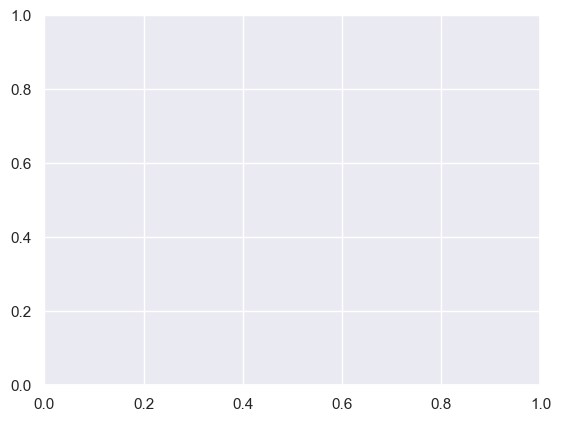

In [82]:
plt.scatter(X_test, y_test, color="black")
plt.plot(X_train, y_train, color="blue", linewidth=3)